In [1]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# 1.Importing Data

We will look at the stock AAPL to analyse twitter sentiment and stock price. We will be extracting tweets and stock prices from 2015 to 2019

In [2]:
tweet = pd.read_csv("Tweet.csv")
display(tweet)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...,...
3717959,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6
3717960,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1
3717961,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5
3717962,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1


In [8]:
aaplprice = pd.read_csv("AAPL.csv")
display(aaplprice)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565701,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873642,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875896,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210682,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140911,237458000
...,...,...,...,...,...,...,...
1252,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.451057,98572000
1253,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.517082,48478800
1254,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.896332,93121200
1255,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.869423,146266000


# 2.Data Cleaning 

The tweet dataset shows the tweets that mentions the top NASDAQ companies. Lets remove the unwanted companies.

We further clean the dataset by removing the tweet_id and converting UNIX time to GMT

In [3]:
tweet = tweet[tweet['body'].str.contains('Apple|AAPL|APPLE|apple|aapl')]
display(tweet)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
5,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
6,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...,...
3717957,1212159254884433921,QuantWolfLine,1577836261,Imagine calling your broker-dealer and wanting...,1,0,1
3717958,1212159275637886976,GMGRIFF_79,1577836266,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",0,0,1
3717959,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6
3717962,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1


In [127]:
clean_tweet = pd.DataFrame(tweet[["tweet_id","writer","post_date","body","comment_num","retweet_num","like_num"]])
dict = {'tweet_id' : 'Tweet ID',
        'writer' : 'Writer',
        'post_date' : 'Date',
        'body' : 'Tweet',
        'comment_num' : 'Comments',
        'retweet_num' : 'Retweets',
        'like_num' : 'Likes'
       }
tweet1 = clean_tweet.rename(columns=dict)
tweet1.reset_index(inplace=True,drop=True)
tweet1.head()

,Tweet ID,Writer,Date,Tweet,Comments,Retweets,Likes
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
3,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
4,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [5]:
#Converting unix date to datetime, as well as removing time posted->only show date posted
#Converting GMT+3 to GMT
import datetime
import pytz
tweet1['Date'] = tweet1['Date'].apply(lambda x: datetime.datetime.fromtimestamp(x, pytz.timezone('Etc/GMT+3')).astimezone(pytz.timezone('Etc/GMT')))
tweet1['Date'] = tweet1['Date'].dt.date
tweet1 = tweet1.sort_values('Date', ascending=True)
display(tweet1)

,Tweet ID,Writer,Date,Tweet,Comments,Retweets,Likes
0,550441509175443456,VisualStockRSRC,2015-01-01,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
206,550736241738526720,TweakTown,2015-01-01,Apple faces lawsuit over massive storage space...,0,0,2
205,550732338670227457,MacHashNews,2015-01-01,"Today's apps gone free: Decide Now, OftenType,...",0,1,3
204,550731345614602240,TalkMarkets,2015-01-01,Gappy New Year! $SPY $DIA $IWM $INTC $MSFT $AA...,0,0,1
203,550730566656876548,johnmknox,2015-01-01,Availability & price are a huge problem plagui...,0,0,1
...,...,...,...,...,...,...,...
1496446,1212019899020611586,HottestStockNow,2019-12-31,"Thinking about buying stock in $AAPL, $BBY, $C...",0,0,0
1496447,1212020035910275072,RyanSTTrader,2019-12-31,$AAPL Unreal,0,0,1
1496448,1212020218878296066,seattlehikertoo,2019-12-31,$AAPL march to more nath. 5G coming and everyo...,0,0,0
1496450,1212020375711887362,IchimokuD,2019-12-31,If it is true that everyone already owns Apple...,0,0,0


## Further cleaning 

Tweets usually contains of the following:

    1. User Tags
    
    2. Website Links 
        
To allow for better modelling, we will replace these with generic terms

In [7]:
aapltweet_csv = tweet1.to_csv('appletweet.csv', index = True)

In [6]:
#Replacing user tags and website links to generic terms

# Define a function to clean the text
def clean_text(text):
    words = text.split()
    for i in range(len(words)):
        if words[i].startswith('@'):
            words[i] = '@user'
        elif words[i].startswith('http'):
            words[i] = 'http'
    return ' '.join(words)

# Apply the clean_text function to the 'text' column
tweet1['Tweet'] = tweet1['Tweet'].apply(clean_text)
# Display the results
display(tweet1)

,Tweet ID,Writer,Date,Tweet,Comments,Retweets,Likes
0,550441509175443456,VisualStockRSRC,2015-01-01,"lx21 made $10,008 on $AAPL -Check it out! http...",0,0,1
206,550736241738526720,TweakTown,2015-01-01,Apple faces lawsuit over massive storage space...,0,0,2
205,550732338670227457,MacHashNews,2015-01-01,"Today's apps gone free: Decide Now, OftenType,...",0,1,3
204,550731345614602240,TalkMarkets,2015-01-01,Gappy New Year! $SPY $DIA $IWM $INTC $MSFT $AA...,0,0,1
203,550730566656876548,johnmknox,2015-01-01,Availability & price are a huge problem plagui...,0,0,1
...,...,...,...,...,...,...,...
1496446,1212019899020611586,HottestStockNow,2019-12-31,"Thinking about buying stock in $AAPL, $BBY, $C...",0,0,0
1496447,1212020035910275072,RyanSTTrader,2019-12-31,$AAPL Unreal,0,0,1
1496448,1212020218878296066,seattlehikertoo,2019-12-31,$AAPL march to more nath. 5G coming and everyo...,0,0,0
1496450,1212020375711887362,IchimokuD,2019-12-31,If it is true that everyone already owns Apple...,0,0,0


## Refining AAPL stock price dataset

Now lets look at the daily stock price of AAPL throughout this timeframe. We will add a column 'Label'. A value of 1 means that closing stock price went up from the previous close and 0 means closing stock price went down from previous close

Note: There is no stock split during this period so there is no need to change the price

In [128]:
# Shift the 'Close' column by 1 day to get the previous day's prices
aaplprice['Prev Close'] = aaplprice['Close'].shift(1)

# Compare 'Close' with 'Prev Close' to get the labels
aaplprice['Label'] = (aaplprice['Close'] > aaplprice['Prev Close']).astype(int)

#AAPL close price before 02/01/2015 is 27.59
aaplprice.loc[0, 'Label'] = 1
aaplprice.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Change,Prev Close,Label
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565701,212818400,0.515000,NaN,1
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873642,257142000,0.510000,27.332500,0
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875896,263188400,0.069999,26.562500,1
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210682,160423600,-0.137501,26.565001,1
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140911,237458000,-0.664999,26.937500,1


In [129]:
#Change in price from open to close
aaplprice['Change'] = aaplprice['Open'] - aaplprice['Close']
aaplprice.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Change,Prev Close,Label
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565701,212818400,0.515000,NaN,1
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873642,257142000,0.510000,27.332500,0
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875896,263188400,0.069999,26.562500,1
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210682,160423600,-0.137501,26.565001,1
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140911,237458000,-0.664999,26.937500,1


# 3.Exploratory Data Analysis

## Textual Analysis of Tweets

The mean tweet length is 17 words.

count    1.496925e+06
mean     1.730920e+01
std      8.560651e+00
min      1.000000e+00
25%      1.200000e+01
50%      1.600000e+01
75%      2.100000e+01
max      6.500000e+01
Name: Tweet, dtype: float64


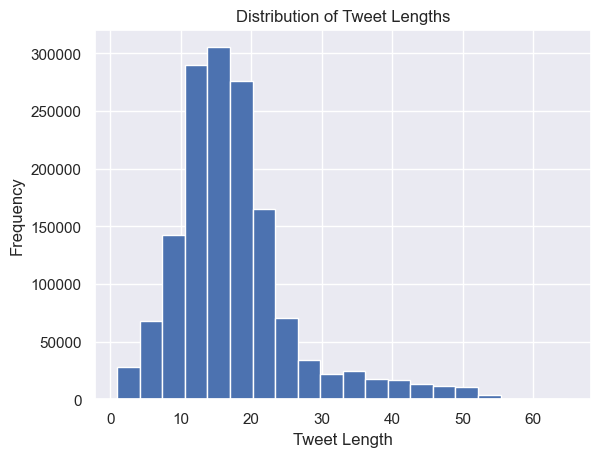

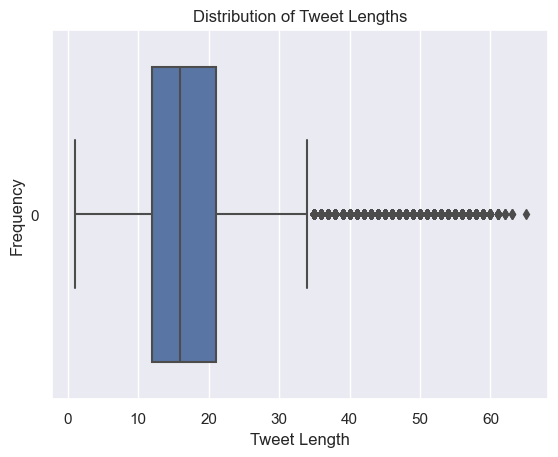

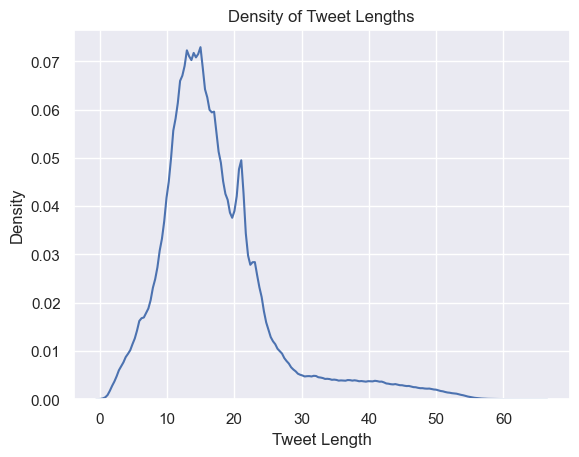

In [16]:
#Analysing length of tweets
lens = tweet1['Tweet'].str.split().apply(lambda x: len(x))
print(lens.describe())
plt.hist(lens,bins=20)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()


sb.boxplot(data = lens, orient = "h")
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show() 

sb.kdeplot(data = lens)
plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.title('Density of Tweet Lengths')
plt.show() 

## Price chart for AAPL

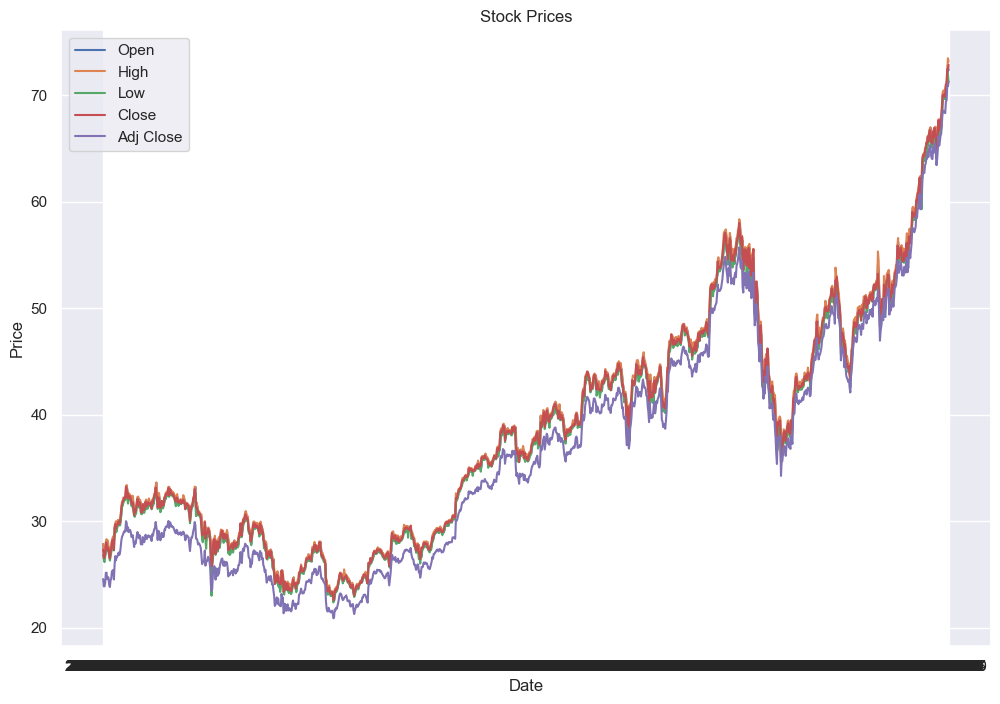

In [17]:
# Set the figure size
plt.figure(figsize=(12,8))

# Plot the different lines for 'Open','High','Low','Close','Adj Close','Volume'
plt.plot(aaplprice['Date'], aaplprice['Open'], label='Open')
plt.plot(aaplprice['Date'], aaplprice['High'], label='High')
plt.plot(aaplprice['Date'], aaplprice['Low'], label='Low')
plt.plot(aaplprice['Date'], aaplprice['Close'], label='Close')
plt.plot(aaplprice['Date'], aaplprice['Adj Close'], label='Adj Close')

# Set the x-axis label, y-axis label, and title of the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices')

# Show the legend for the different lines
plt.legend()

# Display the plot
plt.show()

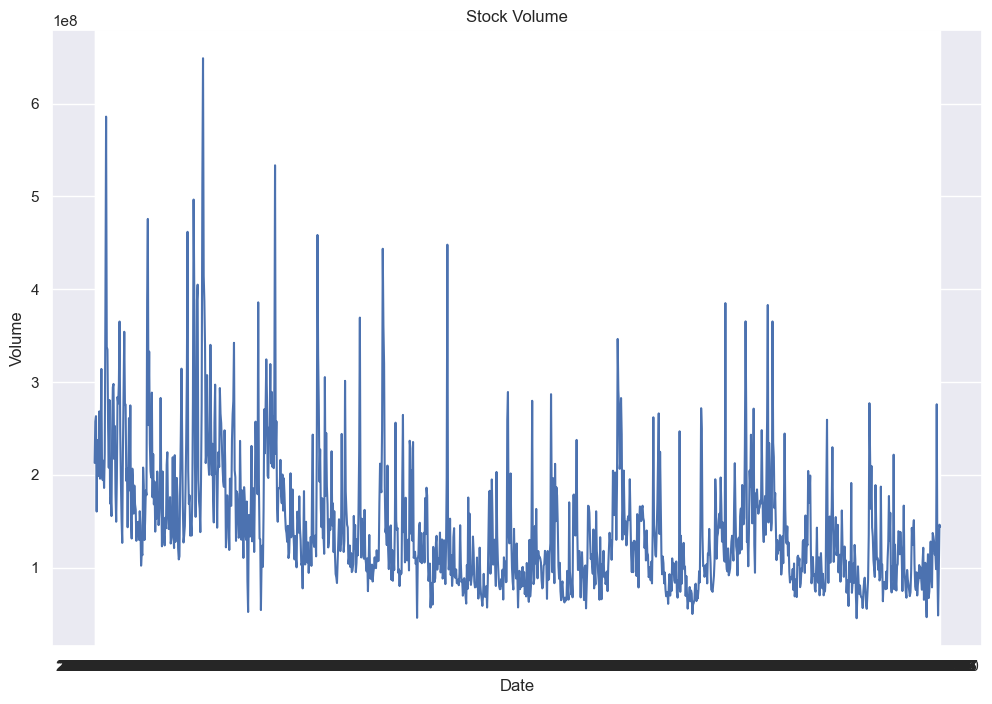

In [18]:
#Displaying volume on a separate graph because its size will skew the graph
plt.figure(figsize=(12,8))
plt.plot(aaplprice['Date'], aaplprice['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Volume')
plt.show()


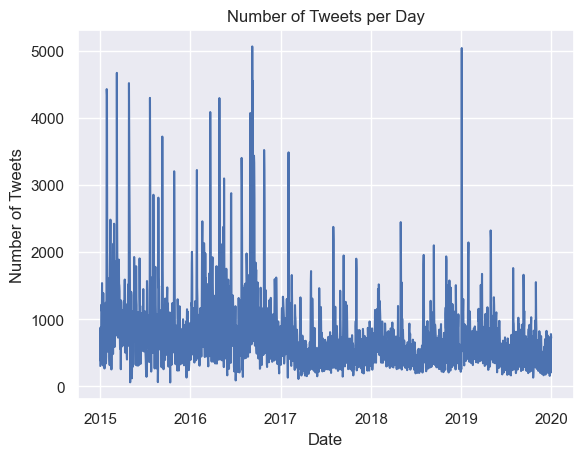

In [15]:
# group the DataFrame by date and count the number of tweets
daily_tweet_count = tweet1.groupby('Date')['Tweet'].count()

# create a line plot of the number of tweets per day
plt.plot(daily_tweet_count.index, daily_tweet_count.values)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Day')
plt.show()

# 3.Sentimental Analysis using VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) is particularly good for analysing sentiment of social media texts as it takes into account linguistic features within a social media text. VADER provides 4 normalised sentiment scores: Negative, Neutral, Positive and Compound. The positive, negative, and neutral scores (ranging from 0 to 1) represent the proportion of the text that is positive, negative, or neutral, respectively. The compound score (ranging from -1 to 1) provides an indication as overall indication of the sentiment of the text.

Given the social nature of tweets, I will be using the VADER model as it is very appropriate.


In [19]:
from tqdm import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### The dataset is very massive with over 1 million rows. Running the model will take a few days to complete which is not very efficient. We will concatenate tweets of the same day together. 

In [20]:
groupedtweet = tweet1.groupby('Date')['Tweet'].apply(' '.join).reset_index()
groupedtweet

,Date,Tweet
0,2015-01-01,"lx21 made $10,008 on $AAPL -Check it out! http..."
1,2015-01-02,Stock_Tracker: $AAPL Recent Headlines 5 New Ye...
2,2015-01-03,Free 5€ in account balance for first 100.000 m...
3,2015-01-04,Jake13: $AAPL Opinion Today Click here to find...
4,2015-01-05,Get $25 when you sign up http #Payoneer w/ my ...
...,...,...
1821,2019-12-27,$AAPL is starting to see Puts coming in. The 1...
1822,2019-12-28,$MTCH $DLTR $QCOM $INTC $AAPL $MSFT $SBUX $AMA...
1823,2019-12-29,Chart Patterns to Watch This Week 12-29-2019 h...
1824,2019-12-30,BOT $AAPL Jan 03 2020 W 287.50 Put @user $AAPL...


In [21]:
#Retrieving polarity scores
res = {}

for i,row in tqdm(groupedtweet.iterrows(), total=len(groupedtweet)):
    text = row['Tweet']
    res[i] = sia.polarity_scores(text)

100%|██████████| 1826/1826 [33:21<00:00,  1.10s/it]  


In [22]:
res

{0: {'neg': 0.034, 'neu': 0.848, 'pos': 0.119, 'compound': 0.9999},
 1: {'neg': 0.052, 'neu': 0.837, 'pos': 0.111, 'compound': 1.0},
 2: {'neg': 0.025, 'neu': 0.821, 'pos': 0.154, 'compound': 1.0},
 3: {'neg': 0.03, 'neu': 0.828, 'pos': 0.142, 'compound': 1.0},
 4: {'neg': 0.046, 'neu': 0.824, 'pos': 0.129, 'compound': 1.0},
 5: {'neg': 0.049, 'neu': 0.814, 'pos': 0.137, 'compound': 1.0},
 6: {'neg': 0.044, 'neu': 0.834, 'pos': 0.123, 'compound': 1.0},
 7: {'neg': 0.034, 'neu': 0.83, 'pos': 0.136, 'compound': 1.0},
 8: {'neg': 0.04, 'neu': 0.834, 'pos': 0.126, 'compound': 1.0},
 9: {'neg': 0.018, 'neu': 0.855, 'pos': 0.127, 'compound': 1.0},
 10: {'neg': 0.016, 'neu': 0.853, 'pos': 0.131, 'compound': 1.0},
 11: {'neg': 0.041, 'neu': 0.834, 'pos': 0.126, 'compound': 1.0},
 12: {'neg': 0.045, 'neu': 0.809, 'pos': 0.146, 'compound': 1.0},
 13: {'neg': 0.052, 'neu': 0.825, 'pos': 0.123, 'compound': 1.0},
 14: {'neg': 0.063, 'neu': 0.831, 'pos': 0.106, 'compound': 1.0},
 15: {'neg': 0.06, '

In [23]:
result = pd.DataFrame(res).T
merged_df = pd.merge(groupedtweet, result, left_index=True, right_index=True)
merged_df

,Date,Tweet,neg,neu,pos,compound
0,2015-01-01,"lx21 made $10,008 on $AAPL -Check it out! http...",0.034,0.848,0.119,0.9999
1,2015-01-02,Stock_Tracker: $AAPL Recent Headlines 5 New Ye...,0.052,0.837,0.111,1.0000
2,2015-01-03,Free 5€ in account balance for first 100.000 m...,0.025,0.821,0.154,1.0000
3,2015-01-04,Jake13: $AAPL Opinion Today Click here to find...,0.030,0.828,0.142,1.0000
4,2015-01-05,Get $25 when you sign up http #Payoneer w/ my ...,0.046,0.824,0.129,1.0000
...,...,...,...,...,...,...
1821,2019-12-27,$AAPL is starting to see Puts coming in. The 1...,0.042,0.840,0.119,1.0000
1822,2019-12-28,$MTCH $DLTR $QCOM $INTC $AAPL $MSFT $SBUX $AMA...,0.033,0.853,0.114,0.9999
1823,2019-12-29,Chart Patterns to Watch This Week 12-29-2019 h...,0.039,0.844,0.116,0.9999
1824,2019-12-30,BOT $AAPL Jan 03 2020 W 287.50 Put @user $AAPL...,0.041,0.821,0.138,1.0000


## Plotting variables against stock price

From the graphs, we can visually observe that when a variable such as negative or positive changes, the direction of the stock price will generally follow suit

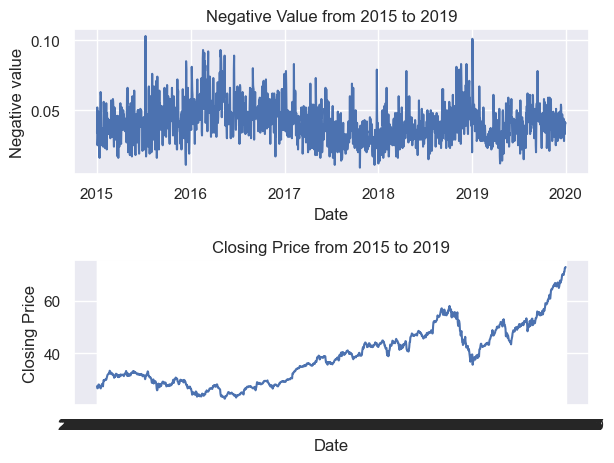

In [24]:
plt.subplot(2, 1, 1) 
plt.plot(merged_df['Date'], merged_df['neg'])
plt.xlabel('Date')
plt.ylabel('Negative value')
plt.title('Negative Value from 2015 to 2019')

plt.subplot(2, 1, 2) 
plt.plot(aaplprice['Date'], aaplprice['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price from 2015 to 2019')

plt.tight_layout()
plt.show()

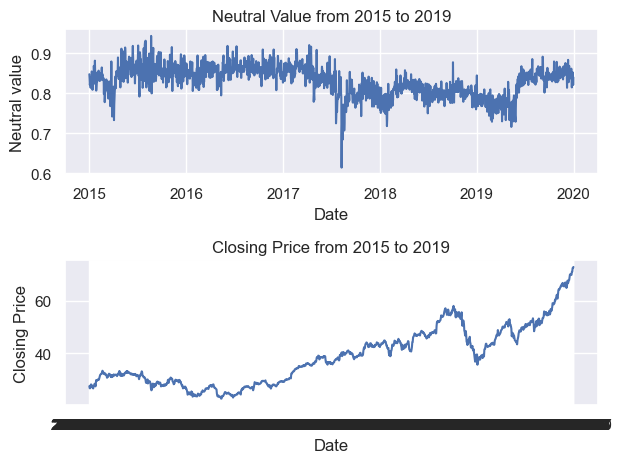

In [25]:
plt.subplot(2, 1, 1) 
plt.plot(merged_df['Date'], merged_df['neu'])
plt.xlabel('Date')
plt.ylabel('Neutral value')
plt.title('Neutral Value from 2015 to 2019')

plt.subplot(2, 1, 2) 
plt.plot(aaplprice['Date'], aaplprice['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price from 2015 to 2019')

plt.tight_layout()
plt.show()

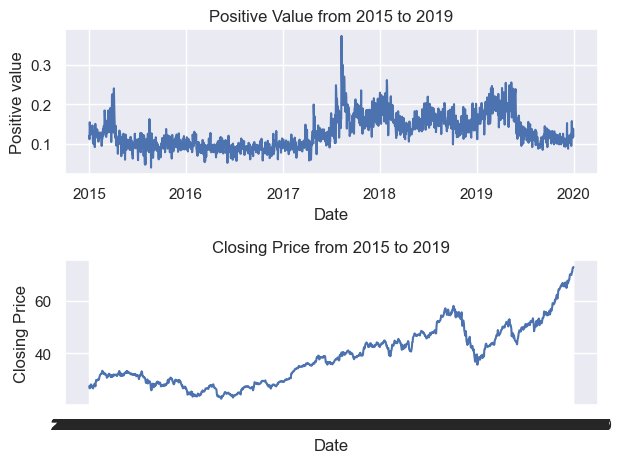

In [26]:
plt.subplot(2, 1, 1) 
plt.plot(merged_df['Date'], merged_df['pos'])
plt.xlabel('Date')
plt.ylabel('Positive value')
plt.title('Positive Value from 2015 to 2019')

plt.subplot(2, 1, 2) 
plt.plot(aaplprice['Date'], aaplprice['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price from 2015 to 2019')

plt.tight_layout()
plt.show()

## Merging stockprice and tweet dataframe

In the process of merging, we will drop the tweets that were tweeted on Saturday, Sunday as well as public holidays as the stock market is not open on those day.

In [43]:
# Convert the 'Date' column in the 'aaplprice' DataFrame to datetime format
aaplprice['Date'] = pd.to_datetime(aaplprice['Date'], format='%Y-%m-%d')
# Convert the 'Date' column in the 'merged_df' DataFrame to a datetime object
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [137]:
sentimentAndStockPrice = pd.merge(merged_df, aaplprice[['Date', 'Close','Label','Open','High','Low','Adj Close','Volume']], on='Date')
display(sentimentAndStockPrice)

,Date,Tweet,neg,neu,pos,compound,Close,Label,Open,High,Low,Adj Close,Volume
0,2015-01-02,Stock_Tracker: $AAPL Recent Headlines 5 New Ye...,0.052,0.837,0.111,1.0,27.332500,1,27.847500,27.860001,26.837500,24.565701,212818400
1,2015-01-05,Get $25 when you sign up http #Payoneer w/ my ...,0.046,0.824,0.129,1.0,26.562500,0,27.072500,27.162500,26.352501,23.873642,257142000
2,2015-01-06,"$AAPL: 3 open, suited signals indicate continu...",0.049,0.814,0.137,1.0,26.565001,1,26.635000,26.857500,26.157499,23.875896,263188400
3,2015-01-07,$AAPL - strategy MACD and RSI alert - LOL: How...,0.044,0.834,0.123,1.0,26.937500,1,26.799999,27.049999,26.674999,24.210682,160423600
4,2015-01-08,"$AAPL stock content, charts, analysis, & more ...",0.034,0.830,0.136,1.0,27.972500,1,27.307501,28.037500,27.174999,25.140911,237458000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2019-12-23,$AAPL high OI range is 0.00 to 0.00 for option...,0.044,0.862,0.094,1.0,71.000000,1,70.132500,71.062500,70.092499,69.451057,98572000
1253,2019-12-24,How I Modded the Silicone Tips of AirPods Pro ...,0.040,0.835,0.125,1.0,71.067497,1,71.172501,71.222504,70.730003,69.517082,48478800
1254,2019-12-26,$AAPL 60 min update $KWBT Visible Whale Count ...,0.041,0.835,0.124,1.0,72.477501,1,71.205002,72.495003,71.175003,70.896332,93121200
1255,2019-12-27,$AAPL is starting to see Puts coming in. The 1...,0.042,0.840,0.119,1.0,72.449997,0,72.779999,73.492500,72.029999,70.869423,146266000


In [108]:
#Check for null values in dataframe
sentimentAndStockPrice.isnull().sum()

Date        0
Tweet       0
neg         0
neu         0
pos         0
compound    0
Close       0
Label       0
dtype: int64

## Observation 1: Distribution of variables: 

'neg' and 'pos' variables have a positive skew. We will correct them using transformation. This is important later on as our model depends on a normal distribution

Text(0, 0.5, 'Frequency')

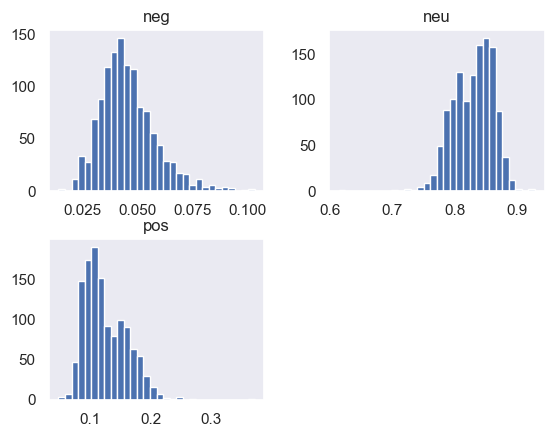

In [133]:
hist = sentimentAndStockPrice.hist(column=['neg', 'neu', 'pos'], bins=30, grid=False)

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

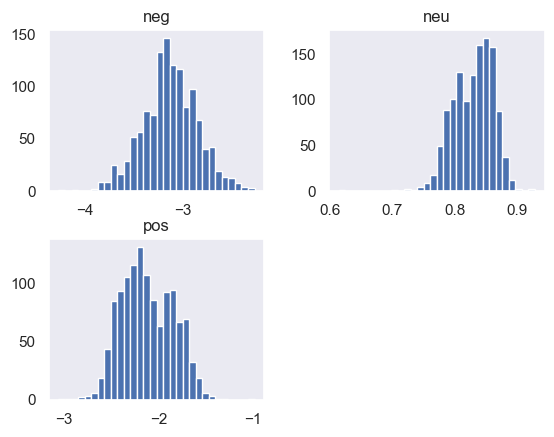

In [134]:
sentimentAndStockPrice['neg'] = np.log(sentimentAndStockPrice['neg'])
sentimentAndStockPrice['pos'] = np.log(sentimentAndStockPrice['pos'])

hist = sentimentAndStockPrice.hist(column=['neg', 'neu', 'pos'], bins=30, grid=False)

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

## Observation 2: Choosing of variables

'neg' has a correlation of -0.314548 and 'pos' has a correlation of 0.480947 against closing price. Since negative and positive have a medium correlation against stock close price, we can use these 2 variables for our model. 

We will not use neutral values as they do not display any emotions or sentiments from tweet users that can help to predict stock price

In [135]:
#Printing correlation matrix
corr_matrix = sentimentAndStockPrice[['Close', 'neg', 'neu', 'pos']].corr()[['Close']]
corr_matrix

,Close
Close,1.000000
neg,-0.314548
neu,-0.359332
pos,0.480947


# 4.Prediction

We will use the sentiment variables to help predict whether or not the stock price will rise or fall. Since our variables are only have values from 0 to 1, it is not possible to predict the stock price as the stock price can reach new highs and these data is not present in our dataset (i.e. if stock price keeps going up, our sentiment variable will never exceed 1). Given this limitation, we can however still use sentiment to predict whether or not AAPL stock price will rise or fall given the sentiment on that day

Since this is a classification problem, we will use Linear Discriminant Analysis(LDA) as our model of choice.



In [100]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Creating train test set

Train set will be from 2015-2018, Test set will be 2019

In [138]:
#Prepare training set
date_range = pd.date_range(start='2015-01-01', end='2018-12-31', freq='D')
new_df = pd.DataFrame({'date': date_range})
new_df['date'] = pd.to_datetime(new_df['date'])

train_df = pd.merge(sentimentAndStockPrice, new_df, left_on=sentimentAndStockPrice['Date'].dt.date, right_on=new_df['date'].dt.date, how='right')
train_df.dropna(inplace=True)
train_df.drop(columns=['key_0','date'], inplace=True)
train_df.head()

,Date,Tweet,neg,neu,pos,compound,Close,Label,Open,High,Low,Adj Close,Volume
1,2015-01-02,Stock_Tracker: $AAPL Recent Headlines 5 New Ye...,0.052,0.837,0.111,1.0,27.332500,1.0,27.847500,27.860001,26.837500,24.565701,212818400.0
4,2015-01-05,Get $25 when you sign up http #Payoneer w/ my ...,0.046,0.824,0.129,1.0,26.562500,0.0,27.072500,27.162500,26.352501,23.873642,257142000.0
5,2015-01-06,"$AAPL: 3 open, suited signals indicate continu...",0.049,0.814,0.137,1.0,26.565001,1.0,26.635000,26.857500,26.157499,23.875896,263188400.0
6,2015-01-07,$AAPL - strategy MACD and RSI alert - LOL: How...,0.044,0.834,0.123,1.0,26.937500,1.0,26.799999,27.049999,26.674999,24.210682,160423600.0
7,2015-01-08,"$AAPL stock content, charts, analysis, & more ...",0.034,0.830,0.136,1.0,27.972500,1.0,27.307501,28.037500,27.174999,25.140911,237458000.0


In [139]:
#Prepare test set
date_range = pd.date_range(start='2019-01-01', end='2019-12-31', freq='D')
new_df1 = pd.DataFrame({'date': date_range})
new_df1['date'] = pd.to_datetime(new_df1['date'])

test_df = pd.merge(sentimentAndStockPrice, new_df1, left_on=sentimentAndStockPrice['Date'].dt.date, right_on=new_df1['date'].dt.date, how='right')
test_df.dropna(inplace=True)
test_df.drop(columns=['key_0','date'], inplace=True)
test_df.head()

,Date,Tweet,neg,neu,pos,compound,Close,Label,Open,High,Low,Adj Close,Volume
1,2019-01-02,$AAPL collapsing LOL Tim Cook’s vision was to ...,0.101,0.788,0.111,1.0,39.480000,1.0,38.722500,39.712502,38.557499,38.047039,148158800.0
2,2019-01-03,"Yeah, $AAPL had been ""Holding"" that Sales Info...",0.099,0.790,0.111,1.0,35.547501,0.0,35.994999,36.430000,35.500000,34.257286,365248800.0
3,2019-01-04,Yep. I did a #podcast about why $AAPL stock ta...,0.074,0.787,0.139,1.0,37.064999,1.0,36.132500,37.137501,35.950001,35.719707,234428400.0
6,2019-01-07,+500 $INDU and $AAPL goes green. Book it. Here...,0.051,0.791,0.158,1.0,36.982498,0.0,37.174999,37.207500,36.474998,35.640190,219111200.0
7,2019-01-08,that's what FATUOUS @user gov shutdown brings ...,0.054,0.796,0.150,1.0,37.687500,1.0,37.389999,37.955002,37.130001,36.319607,164101200.0


In [115]:
# Split into train test set
X_train = np.array(train_df[['neg','pos']])
Y_train = train_df['Label'].values
X_test = np.array(test_df[['neg','pos']])
Y_test = test_df['Label'].values

In [116]:
model = LinearDiscriminantAnalysis().fit(X_train,Y_train)

In [118]:
predictions = model.predict(X_test)
predictions

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1.

In [120]:
Y_test

array([1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0.

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import plotly.express as px
import statistics
from scipy import stats

In [121]:
#Show the model metrics
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.53      0.27      0.36       106
         1.0       0.61      0.82      0.70       145

    accuracy                           0.59       251
   macro avg       0.57      0.55      0.53       251
weighted avg       0.57      0.59      0.56       251

